In [42]:
import pandas as pd

In [54]:
file_path = 'GSAF5_Clean.csv'

# Read the Excel file
babyshark_clean = pd.read_csv(file_path)
babyshark_clean

,Date,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,AgeGroup_category,TimeCategory
0,23-01-2025,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,SHIPWRECK COVE,water activity,Boy,M,12.0,Minor bite to lower body,N,1711.0,unknown,Bob Myatt GSAF,Child,Afternoon
1,22-01-2025,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,CHEYNES BEACH,surfing,Dale Kittow,M,37.0,None - chunk of surfboard bitten out,N,1600.0,whaler,Bob Myatt GSAF,Adult,Afternoon
2,11-01-2025,Provoked,USA,HAWAII,OFF HALEIWA BOAT HARBOUR OAHU,water activity,Male not stated was a dive tour worker,M,23.0,Bitten on the arm,N,1340.0,unknown,Kevin McMurray Trackingsharks.com,Adult,Afternoon
3,02-01-2025,Unprovoked,NEW CALEDONIA,GRANDE TERRE,ISLET OF KENDEK NEAR KOUMAC,spearfishing,Robert Cuewapuru,M,40.0,Severe arm injury and delay in medical treatme...,Y,1615.0,bull,Johannes Marchand Todd Smith,Adult,Afternoon
4,02-01-2025,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,GRANITES BEACH NEAR WESTALL STREAKY BAY,surfing,Lance Appleby,M,28.0,Body not recovered,Y,1710.0,white,Glen Folkard: Simon De Marchi News.com.au: The...,Adult,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,16-07-1903,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,ROEBUCK BAY,water activity,NaN,M,28.1,FATAL,Y,0.0,unknown,"H. Taunton; N. Bartlett, p. 234",Adult,unknown
6988,16-07-1903,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,no information,water activity,Ahmun,M,28.1,FATAL,Y,0.0,unknown,"H. Taunton; N. Bartlett, pp. 233-234",Adult,unknown
6989,16-07-1900,Unprovoked,USA,NORTH CAROLINA,OCRACOKE INLET,swimming,Coast Guard personnel,M,28.1,FATAL,Y,0.0,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",Adult,unknown
6990,16-07-1883,Unprovoked,PANAMA,BA,"PANAMA BAY 8ºN, 79ºW",water activity,Jules Patterson,M,28.1,FATAL,Y,0.0,unknown,"The Sun, 10/20/1938",Adult,unknown


In [8]:
babyshark_clean.describe()

,Age,Time
count,6992.000000,6988.000000
mean,28.100415,608.126646
std,10.829730,698.175984
min,1.000000,0.000000
25%,22.000000,0.000000
50%,28.100000,0.000000
75%,28.100000,1300.000000
max,87.000000,2330.000000


In [92]:
babyshark_clean[['Year', 'Month', 'Day']] = babyshark_clean['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).apply(lambda x: pd.Series([x.year, x.month, x.day]))

/var/folders/hv/sgj9c8cn0ql8vfb3lx01lzbr0000gn/T/ipykernel_34591/688068191.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  babyshark_clean[['Year', 'Month', 'Day']] = babyshark_clean['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).apply(lambda x: pd.Series([x.year, x.month, x.day]))


In [94]:
babyshark_clean['Year']

0       2025.0
1       2025.0
2       2025.0
3       2025.0
4       2025.0
         ...  
6987    1903.0
6988    1903.0
6989    1900.0
6990    1883.0
6991    1845.0
Name: Year, Length: 6992, dtype: float64

<Axes: xlabel='Month', ylabel='Count'>

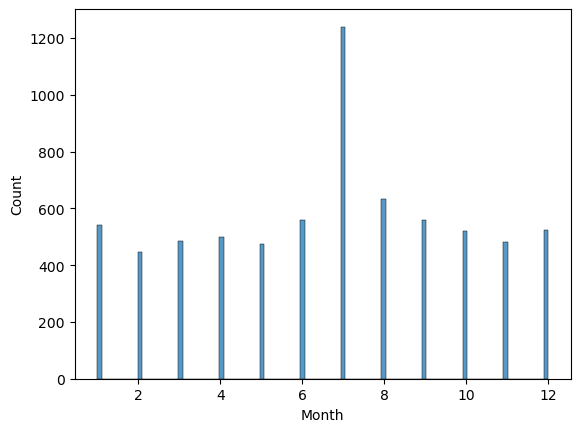

In [100]:
import seaborn as sns
sns.histplot(babyshark_clean['Month'], bins=100) 

In [98]:
babyshark_clean.groupby(['Sex','Fatal Y/N'])['Month'].median()

Sex  Fatal Y/N
F    N            7.0
     Y            7.0
M    N            7.0
     Y            7.0
Name: Month, dtype: float64

<Axes: xlabel='Month', ylabel='Fatal Y/N'>

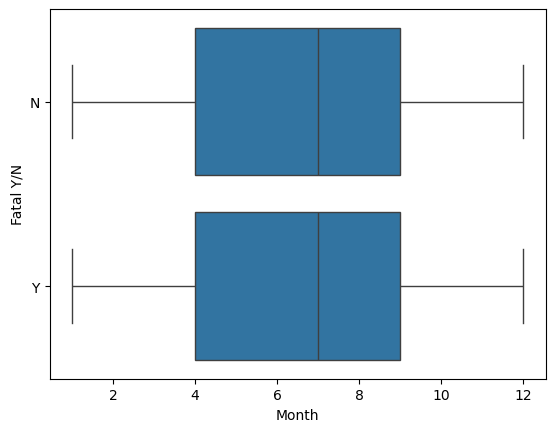

In [112]:
sns.boxplot(x='Month', y='Fatal Y/N', data=babyshark_clean)

In [159]:
babyshark_clean['State'].value_counts().head(10)

State
FLORIDA                  1186
NEW SOUTH WALES           523
QUEENSLAND                351
no information            344
HAWAII                    344
CALIFORNIA                324
WESTERN AUSTRALIA         236
KWAZULU-NATAL             218
WESTERN CAPE PROVINCE     197
SOUTH CAROLINA            174
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='Count'>

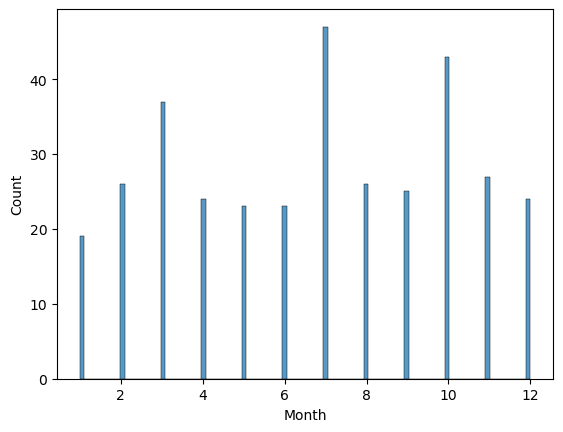

In [165]:
babyshark_clean_HAWAII = babyshark_clean[babyshark_clean['State'] == 'HAWAII']
sns.histplot(babyshark_clean_HAWAII['Month'], bins=100) 

In [137]:
babyshark_clean['Country'].value_counts().head(10)

Country
USA                 2523
AUSTRALIA           1492
SOUTH AFRICA         598
no information       165
PAPUA NEW GUINEA     144
NEW ZEALAND          142
BAHAMAS              139
BRAZIL               122
MEXICO               106
FIJI                  83
Name: count, dtype: int64

In [167]:
babyshark_clean['Country'].value_counts()
portugal
australia
US
indonesia
nz
sa
me

Country
USA                                     2523
AUSTRALIA                               1492
SOUTH AFRICA                             598
no information                           165
PAPUA NEW GUINEA                         144
                                        ... 
NORTHERN MARIANA ISLANDS                   1
ZAMBIA                                     1
ST MARTIN                                  1
VENEZUELA, BOLIVARIAN REPUBLIC OF          1
UNITED STATES MINOR OUTLYING ISLANDS       1
Name: count, Length: 154, dtype: int64

<Axes: xlabel='Month', ylabel='Count'>

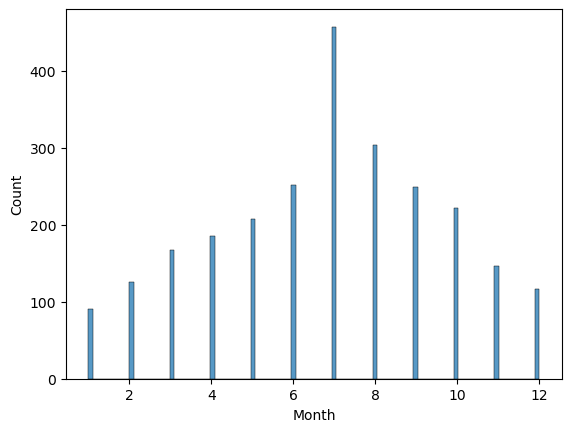

In [145]:
babyshark_clean_US = babyshark_clean[babyshark_clean['Country'] == 'USA']
sns.histplot(babyshark_clean_US['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

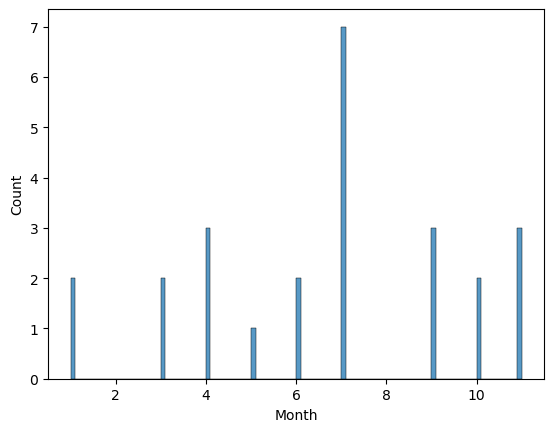

In [171]:
babyshark_clean_Indonesia = babyshark_clean[babyshark_clean['Country'] == 'INDONESIA']
sns.histplot(babyshark_clean_Indonesia['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

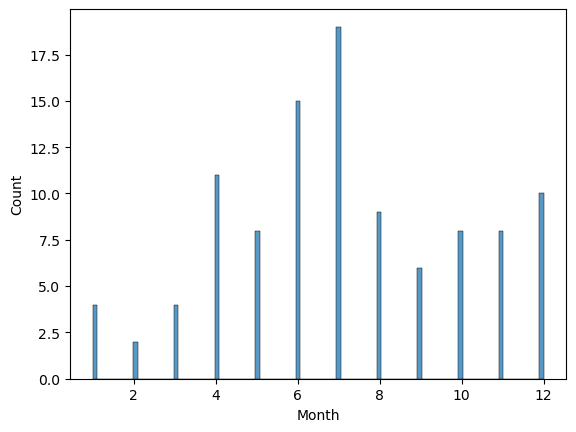

In [173]:
babyshark_clean_Mexico = babyshark_clean[babyshark_clean['Country'] == 'MEXICO']
sns.histplot(babyshark_clean_Mexico['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

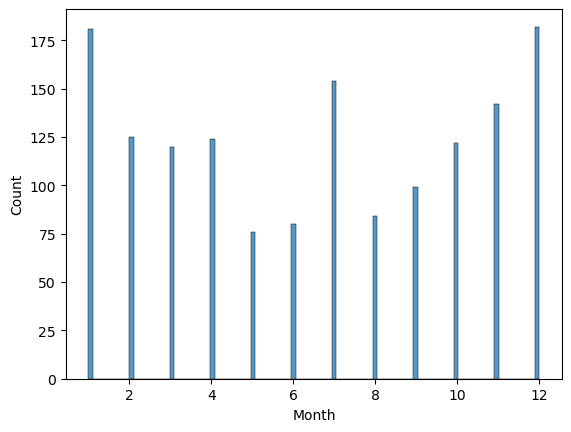

In [149]:
babyshark_clean_Australia = babyshark_clean[babyshark_clean['Country'] == 'AUSTRALIA']
sns.histplot(babyshark_clean_Australia['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

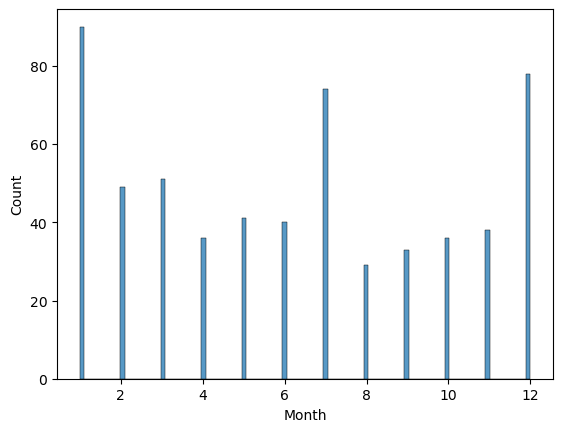

In [151]:
babyshark_clean_SA = babyshark_clean[babyshark_clean['Country'] == 'SOUTH AFRICA']
sns.histplot(babyshark_clean_SA['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

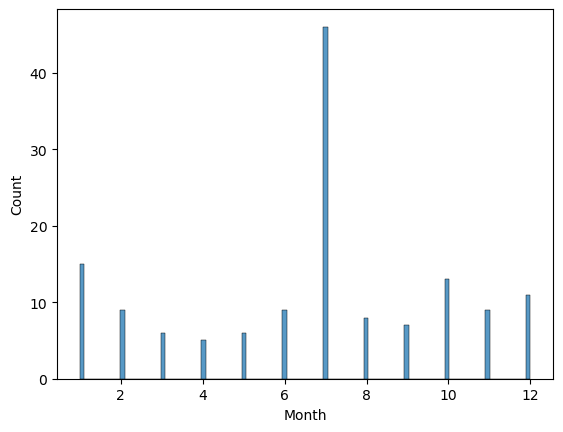

In [153]:
babyshark_clean_PNG = babyshark_clean[babyshark_clean['Country'] == 'PAPUA NEW GUINEA']
sns.histplot(babyshark_clean_PNG['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

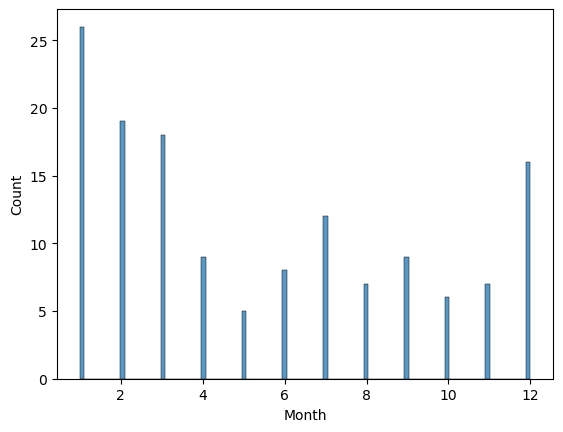

In [155]:
babyshark_clean_NZ = babyshark_clean[babyshark_clean['Country'] == 'NEW ZEALAND']
sns.histplot(babyshark_clean_NZ['Month'], bins=100) 

<Axes: xlabel='Month', ylabel='Count'>

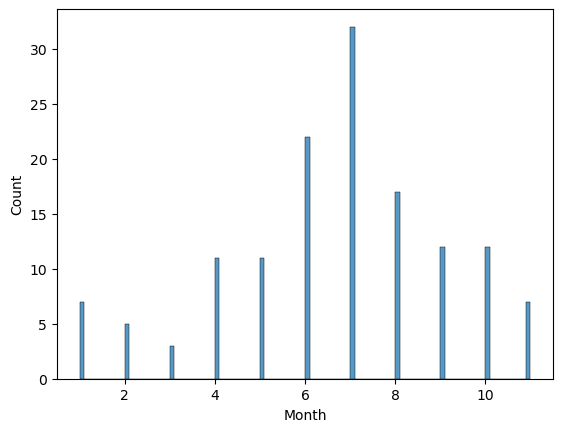

In [157]:
babyshark_clean_BAHAMAS = babyshark_clean[babyshark_clean['Country'] == 'BAHAMAS']
sns.histplot(babyshark_clean_BAHAMAS['Month'], bins=100) 